- Used to find optimum hyperparameter
- Hyperparameters:
    - Linkage
    - Distance metric
- Cophenetic correlation should be maximum
- Value lie between [0,1]

- Once you identfy optimal hyperparameters: linkage and distance
- Use silehoutte score to identify optimal number of clusters

- If you know of any other method of finding optimum number of clusters, let me know

In [24]:
import warnings
warnings.filterwarnings('ignore')

In [25]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from scipy.spatial.distance import pdist
from scipy.stats import pearsonr
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

In [26]:
df = pd.read_csv('vehicle-1.csv')

In [27]:
df.dropna(inplace = True)

In [28]:
X = df.drop('class', axis=1)

In [29]:
X = (X - X.mean()) / X.std()

In [30]:
Z = linkage(X[0:5],
            method = 'ward',
            metric='euclidean')
Z.shape

(4, 4)

In [31]:
Z

array([[ 1.        ,  3.        ,  2.79919221,  2.        ],
       [ 0.        ,  5.        ,  3.73585146,  3.        ],
       [ 2.        ,  6.        ,  6.52041096,  4.        ],
       [ 4.        ,  7.        , 17.08039185,  5.        ]])

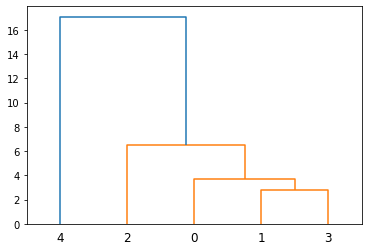

In [32]:
# Hint: Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=40,
)
plt.show()

In [33]:
distance_between_pair_of_points = pdist(X[0:5])

In [34]:
distance_between_pair_of_points

array([ 3.07207498,  4.3367978 ,  3.92619065, 12.98653236,  5.69900095,
        2.79919221, 13.78760992,  6.68140125, 13.61390703, 14.74505682])

- 3.07207498: distance between point 0 and 1
- 4.3367978: 0 and 2
- 3.92619065: 0 and 3
- 12.98653236: 0 and 4
- 5.69900095: 1 and 2
- 2.79919221: 1 and 3
- 13.78760992: 1 and 4
- 6.68140125: 2 and 3
- 13.61390703: 2 and 4
- 14.74505682: 3 and 4

In [35]:
cophenet_Z = cophenet(Z)

- Copehent show the distance between pair of points in the dendograph
- The distance (Y-Axis) when those 2 point meet for the first time
- This distance should be small when actual distance between them is small, and vice versa

In [36]:
cophenet_Z

array([ 3.73585146,  6.52041096,  3.73585146, 17.08039185,  6.52041096,
        2.79919221, 17.08039185,  6.52041096, 17.08039185, 17.08039185])

In the above dendograph, 


- 3.73585146: distance between point 0 and 1
- 6.52041096: point 0 and 2
- ...and so on
- same as distance matrix

In [37]:
cophenet_correlation = pearsonr(cophenet_Z, distance_between_pair_of_points)[0]

In [38]:
cophenet_correlation

0.9893439474377821

#### Calulcate with other linkage method

In [39]:
Z = linkage(X,
            method = 'complete',
            metric='euclidean')

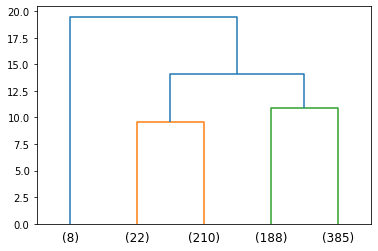

In [40]:
# Hint: Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=5,
)
plt.show()

- In the above dendograph, distance between point 0 and 1 is just less than 4
- distance between 1 and 3 is lowest

In [41]:
distance_between_pair_of_points = pdist(X[0:5])

In [42]:
cophenet_Z = cophenet(Z)

In [43]:
cophenet_correlation = pearsonr(cophenet(Z), distance_between_pair_of_points)[0]
cophenet_correlation

ValueError: x and y must have the same length.

In [ ]:
for linkage in []:
    for distance in []:
        copehent...

Not changing much, because we have taken only 5 observations

Try with bigger data

In [ ]:
Z = linkage(X,
            method = 'complete',
            metric='euclidean')
distance_between_pair_of_points = pdist(X)
cophenet_Z = cophenet(Z)
cophenet_correlation = pearsonr(cophenet(Z), distance_between_pair_of_points)[0]
cophenet_correlation

In [ ]:
Z = linkage(X,
            method = 'ward',
            metric='euclidean')
distance_between_pair_of_points = pdist(X)
cophenet_Z = cophenet(Z)
cophenet_correlation = pearsonr(cophenet(Z), distance_between_pair_of_points)[0]
cophenet_correlation

In [ ]:
Z = linkage(X,
            method = 'average',
            metric='euclidean')
distance_between_pair_of_points = pdist(X)
cophenet_Z = cophenet(Z)
cophenet_correlation = pearsonr(cophenet(Z), distance_between_pair_of_points)[0]
cophenet_correlation

- average + euclidean seems to be the best
- We have not tried different Distance methods. Not all linkage methods support all distance methods
- For example if we take 'mahalanobis': ward linkage method is not supported
- when you change distance metric, change both in pdist and linkage function


Distance methods: 'braycurtis', 'canberra', 'chebyshev', 'cityblock',
    'correlation', 'cosine', 'dice', 'euclidean', 'hamming',
    'jaccard', 'jensenshannon', 'kulsinski', 'mahalanobis', 'matching',
    'minkowski', 'rogerstanimoto', 'russellrao', 'seuclidean',
    'sokalmichener', 'sokalsneath', 'sqeuclidean', 'yule'

In [ ]:
Z = linkage(X,
            method = 'ward',
            metric='mahalanobis')
distance_between_pair_of_points = pdist(X, metric='mahalanobis')
cophenet_Z = cophenet(Z)
cophenet_correlation = pearsonr(cophenet(Z), distance_between_pair_of_points)[0]
cophenet_correlation

In [ ]:
Z = linkage(X,
            method = 'complete',
            metric='mahalanobis')
distance_between_pair_of_points = pdist(X, metric='mahalanobis')
cophenet_Z = cophenet(Z)
cophenet_correlation = pearsonr(cophenet(Z), distance_between_pair_of_points)[0]
cophenet_correlation

Thank you